In [140]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image, ImageDraw

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Вычисление площади пересечения боксов

In [212]:
def get_angles_from_xywh(bb: list):
    x_left = bb[0] - bb[2]/2
    x_right = bb[0] + bb[2]/2
    y_up = bb[1] + bb[3]/2
    y_down = bb[1] - bb[3]/2

    return {"x1": int(x_left),
            "y1": int(y_up),
            "x2": int(x_right),
            "y2": int(y_down)}

def get_list_from_xywh(bb:list):
    x_left = bb[0] - bb[2]/2
    x_right = bb[0] + bb[2]/2
    y_up = bb[1] + bb[2]/2
    y_down = bb[1] - bb[2]/2

    return [[int(x_left), int(y_up)],
            [int(x_right), int(y_up)],
            [int(x_left), int(y_down)],
            [int(x_right), int(y_down)]]

def plot_rect(bbs: list, color="red"):
    img = Image.new("RGB", (150, 150))
    for bb in bbs:
      angles = get_angles_from_xywh(bb)
      print(angles)
      shape = [(angles['x1'], angles['y1']),
              (angles['x2'], angles['y2'])]
      img1 = ImageDraw.Draw(img)
      img1.rectangle(shape, outline =color)
    plt.imshow(img)


def format_swap(bbx:list):
    bbx_1 = get_list_from_xywh(bbx)
    bbx_1_tmp = bbx_1[-1]
    bbx_1[-1] = bbx_1[-2]
    bbx_1[-2] = bbx_1_tmp
    return bbx_1

In [224]:
first_bbx = [100, 100, 20, 20]
second_bbx = [120, 120, 40, 40]

{'x1': 90, 'y1': 110, 'x2': 110, 'y2': 90}
{'x1': 100, 'y1': 140, 'x2': 140, 'y2': 100}


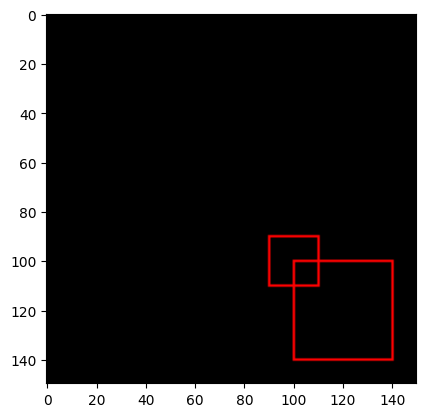

In [225]:
plot_rect([first_bbx, second_bbx])

Теперь вычислим площадь участка соприкосновения

In [256]:
from shapely.geometry import Polygon

def calculate_int(human, zone):

    square = human[2] * human[3]
    human = format_swap(human) # Пусть это будет человек
    zone = format_swap(zone)
    print("!", zone)

    poly_1 = Polygon(human)
    poly_2 = Polygon(zone)
    print(poly_2)
    print("Процент вхождения человека в зону")
    return (poly_1.intersection(poly_2).area / square) * 100

calculate_int(first_bbx, second_bbx)

! [[14, 95], [84, 95], [84, 25], [14, 25]]
POLYGON ((14 95, 84 95, 84 25, 14 25, 14 95))
Процент вхождения человека в зону


2.272727272727273

{'x1': 83, 'y1': 102, 'x2': 97, 'y2': 58}
{'x1': 14, 'y1': 70, 'x2': 84, 'y2': 50}


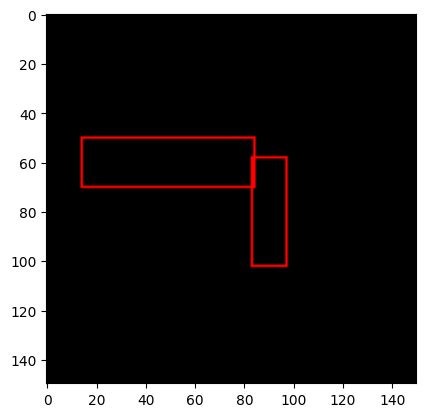

In [257]:
first_bbx = [90, 80, 14, 44]
second_bbx = [49, 60, 70, 20]
plot_rect([first_bbx, second_bbx])

In [258]:
calculate_int(first_bbx, second_bbx)

! [[14, 95], [84, 95], [84, 25], [14, 25]]
POLYGON ((14 95, 84 95, 84 25, 14 25, 14 95))
Процент вхождения человека в зону


2.272727272727273

{'x1': 113, 'y1': 102, 'x2': 127, 'y2': 58}
{'x1': 14, 'y1': 70, 'x2': 84, 'y2': 50}
Процент вхождения человека в зону


0.0

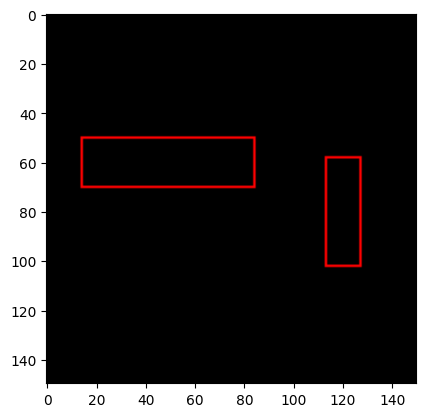

In [234]:
human = [120, 80, 14, 44]
zone = [49, 60, 70, 20]
plot_rect([human, zone])
calculate_int(human, zone)

{'x1': 95, 'y1': 105, 'x2': 105, 'y2': 95}
{'x1': 75, 'y1': 125, 'x2': 125, 'y2': 75}
POLYGON ((75 125, 125 125, 125 75, 75 75, 75 125))
Процент вхождения человека в зону


100.0

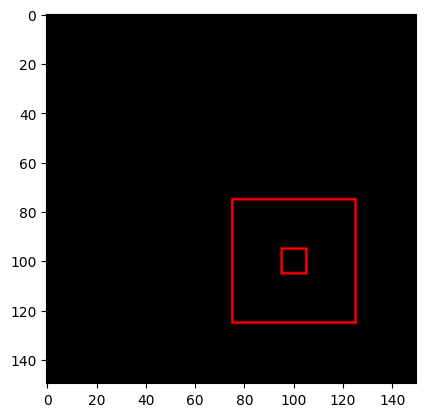

In [252]:
human = [100, 100, 10, 10]
zone = [100, 100, 50, 50]
plot_rect([human, zone])
calculate_int(human, zone)

In [253]:
human = [100, 100, 10, 10]
zone = [100, 100, 50, 50, 23]
# plot_rect([human, zone])
calculate_int(human, zone)

POLYGON ((75 125, 125 125, 125 75, 75 75, 75 125))
Процент вхождения человека в зону


100.0

In [260]:
human = [100, 100, 10, 10]
zone = [100, 100, 50, 50]
# plot_rect([human, zone])
calculate_int(human, zone)

! [[75, 125], [125, 125], [125, 75], [75, 75]]
POLYGON ((75 125, 125 125, 125 75, 75 75, 75 125))
Процент вхождения человека в зону


100.0

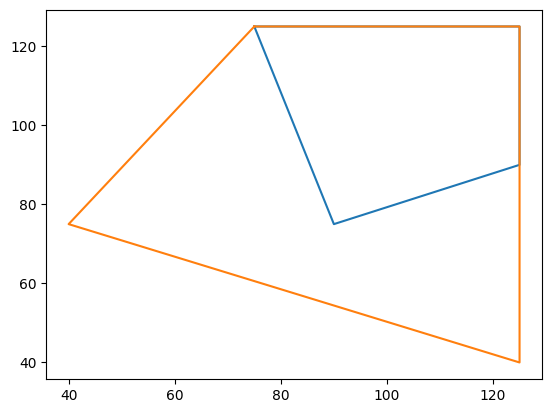

In [270]:
p = Polygon([[75, 125], [125, 125], [125, 90], [90, 75], [75, 125]])
p2 = Polygon([[75, 125], [125, 125], [125, 40], [40, 75], [75, 125]])
plt.plot(*p.exterior.xy)
plt.plot(*p2.exterior.xy)

Итоговая версия

In [274]:
import cv2
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from PIL import Image, ImageDraw
from shapely.geometry import Polygon

def calculate_int(human: list, zone: list, draw=False):
    square = human[2] * human[3]
    # Человека перевожим в координаты
    human = format_swap(human) # Пусть это будет человек
    # Зону просто парсим

    poly_1 = Polygon(human)
    poly_2 = Polygon(zone)
    print("Процент вхождения человека в зону")
    if draw:
      plt.plot(*poly_1.exterior.xy)
      plt.plot(*poly_2.exterior.xy)
    return (poly_1.intersection(poly_2).area / square) * 100

Процент вхождения человека в зону


100.0

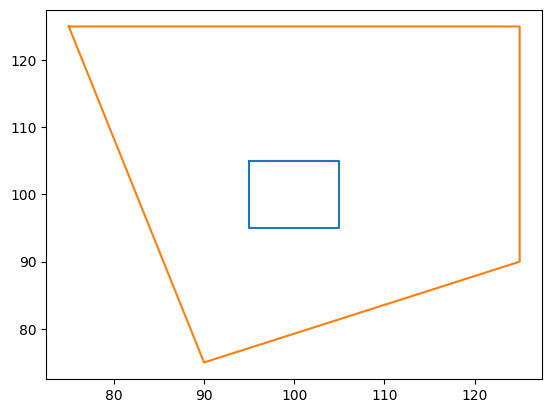

In [275]:
# Берём формат x, y, w, h
human = [100, 100, 10, 10]
# Здесь берём только координаты
zone = [[75, 125], [125, 125], [125, 90], [90, 75], [75, 125]]
calculate_int(human, zone, draw=True)

Процент вхождения человека в зону


55.00000000000001

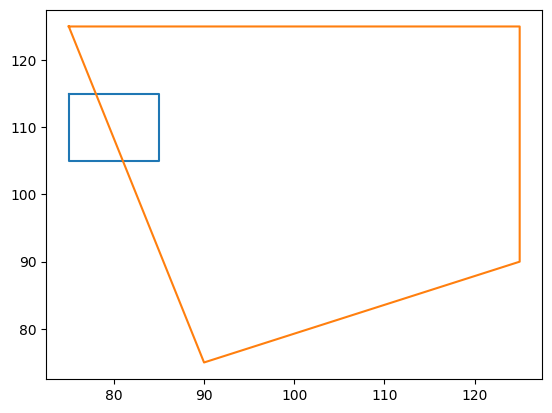

In [277]:
human = [80, 110, 10, 10]
zone = [[75, 125], [125, 125], [125, 90], [90, 75], [75, 125]]
calculate_int(human, zone, draw=True)